In [2]:
#Pruebas AB
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/ab_test-sales_pipeline.csv')
df.head()

,test,conversion,no conversion
0,B,0,1
1,A,0,1
2,A,0,1
3,A,0,1
4,A,0,1


In [5]:
total_count = df.groupby('test')[['conversion','no conversion']].sum()
total_count

,conversion,no conversion
test,,
A,198,23541
B,184,22404


In [7]:
total_count['rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])
total_count

,conversion,no conversion,rate
test,,,
A,198,23541,0.008341
B,184,22404,0.008146


In [8]:
diferencia_proporcion = 1 - (total_count.loc['B']['rate'] / total_count.loc['A']['rate'])

In [10]:
diferencia_porcentaje = diferencia_proporcion * 100
print(f'El test A fue {diferencia_porcentaje:.2f}% más efectivo que B')

El test A fue 2.34% más efectivo que B


## Test de permutación

In [11]:
todas_mediciones = df[['conversion','no conversion']]


In [13]:
total_grupos = df['test'].value_counts()
total_grupos

A    23739
B    22588
Name: test, dtype: int64

In [15]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
  a = df.sample(total_grupos['A'],replace=False)
  conv_a.append(a['conversion'].sum())
  no_conv_a.append(a['no conversion'].sum())

  b = df.loc[~df.index.isin(a.index)]
  conv_b.append(b['conversion'].sum())
  no_conv_b.append(b['no conversion'].sum())

In [16]:
perm_result = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_result

,conv_a,no_conv_a,conv_b,no_conv_b
0,217,23522,165,22423
1,186,23553,196,22392
2,199,23540,183,22405
3,192,23547,190,22398
4,195,23544,187,22401
...,...,...,...,...
995,200,23539,182,22406
996,198,23541,184,22404
997,212,23527,170,22418
998,205,23534,177,22411


In [17]:
perm_result['a_rate'] = perm_result['conv_a'] /(perm_result['conv_a'] + perm_result['no_conv_a'])
perm_result['b_rate'] = perm_result['conv_b'] /(perm_result['conv_b'] + perm_result['no_conv_b'])

In [20]:
perm_result['diff'] = 1 - (perm_result['b_rate'] / perm_result['a_rate'])
perm_result

,conv_a,no_conv_a,conv_b,no_conv_b,a_rate,b_rate,diff
0,217,23522,165,22423,0.009141,0.007305,0.200886
1,186,23553,196,22392,0.007835,0.008677,-0.107459
2,199,23540,183,22405,0.008383,0.008102,0.033543
3,192,23547,190,22398,0.008088,0.008412,-0.040009
4,195,23544,187,22401,0.008214,0.008279,-0.007840
...,...,...,...,...,...,...,...
995,200,23539,182,22406,0.008425,0.008057,0.043630
996,198,23541,184,22404,0.008341,0.008146,0.023354
997,212,23527,170,22418,0.008930,0.007526,0.157252
998,205,23534,177,22411,0.008636,0.007836,0.092589


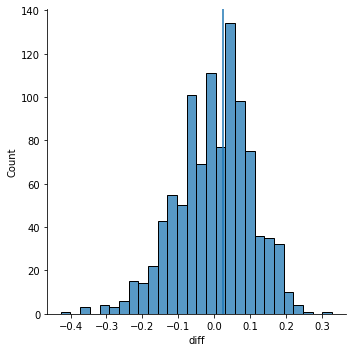

In [23]:
sns.displot(perm_result['diff'])
plt.axvline(diferencia_proporcion);

In [24]:
p = (perm_result['diff'] >= diferencia_proporcion).sum() / perm_result.shape[0]

In [26]:
print(p*100,"%")

46.6 %


In [28]:
## A partir de aquí inicia el reto 1
df = pd.read_csv('https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/ab_test-sales_pipeline-2.csv')
df.head()

,test,conversion,no conversion
0,A,0,1
1,B,0,1
2,A,0,1
3,A,0,1
4,B,0,1


In [30]:
total_count = df.groupby('test')[['conversion','no conversion']].sum()
total_count['rate'] = total_count['conversion'] / (total_count['conversion'] + total_count['no conversion'])
diferencia_proporcion = 1 - (total_count.loc['B']['rate'] / total_count.loc['A']['rate'])

In [32]:
diferencia_porcentaje = diferencia_proporcion * 100
print(f'El test A fue {diferencia_porcentaje:.2f}% más efectivo que B')

El test A fue 2.86% más efectivo que B


In [34]:
todas_mediciones = df[['conversion','no conversion']]
total_grupos = df['test'].value_counts()
total_grupos

B    41588
A    34739
Name: test, dtype: int64

In [35]:
conv_a = []
no_conv_a = []
conv_b = []
no_conv_b = []

for _ in range(1000):
  a = df.sample(total_grupos['A'],replace=False)
  conv_a.append(a['conversion'].sum())
  no_conv_a.append(a['no conversion'].sum())

  b = df.loc[~df.index.isin(a.index)]
  conv_b.append(b['conversion'].sum())
  no_conv_b.append(b['no conversion'].sum())

In [37]:
perm_result = pd.DataFrame({
    'conv_a': conv_a,
    'no_conv_a': no_conv_a,
    'conv_b': conv_b,
    'no_conv_b': no_conv_b
})

perm_result

,conv_a,no_conv_a,conv_b,no_conv_b
0,4115,30624,4889,36699
1,4193,30546,4811,36777
2,4042,30697,4962,36626
3,4088,30651,4916,36672
4,4020,30719,4984,36604
...,...,...,...,...
995,4107,30632,4897,36691
996,4059,30680,4945,36643
997,4083,30656,4921,36667
998,4072,30667,4932,36656


In [38]:
perm_result['a_rate'] = perm_result['conv_a'] /(perm_result['conv_a'] + perm_result['no_conv_a'])
perm_result['b_rate'] = perm_result['conv_b'] /(perm_result['conv_b'] + perm_result['no_conv_b'])
perm_result['diff'] = 1 - (perm_result['b_rate'] / perm_result['a_rate'])
perm_result

,conv_a,no_conv_a,conv_b,no_conv_b,a_rate,b_rate,diff
0,4115,30624,4889,36699,0.118455,0.117558,0.007571
1,4193,30546,4811,36777,0.120700,0.115682,0.041571
2,4042,30697,4962,36626,0.116353,0.119313,-0.025439
3,4088,30651,4916,36672,0.117678,0.118207,-0.004501
4,4020,30719,4984,36604,0.115720,0.119842,-0.035622
...,...,...,...,...,...,...,...
995,4107,30632,4897,36691,0.118224,0.117750,0.004011
996,4059,30680,4945,36643,0.116843,0.118904,-0.017646
997,4083,30656,4921,36667,0.117534,0.118327,-0.006754
998,4072,30667,4932,36656,0.117217,0.118592,-0.011730


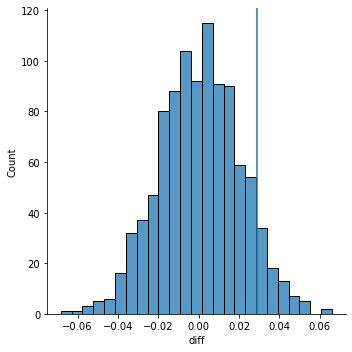

In [40]:
sns.displot(perm_result['diff'])
plt.axvline(diferencia_proporcion);

In [42]:
p = (perm_result['diff'] >= diferencia_proporcion).sum() / perm_result.shape[0]
print(p*100,"%")

7.9 %


# Procesamiento de Lenguaje Natural

In [43]:
#regex
import re

In [44]:
df = pd.read_json('https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/raw/main/Datasets/new_york_times_bestsellers-clean.json')
df

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99
...,...,...,...,...,...,...,...,...,...,...,...,...
3028,http://www.amazon.com/Six-Years-Harlan-Coben/d...,Harlan Coben,Jake Fisher discovers that neither the woman h...,Dutton,SIX YEARS,5b4aa4ead3089013507dc593,1366416000000,1367712000000,9,8,5,27.95
3029,http://www.amazon.com/The-Interestings-Novel-M...,Meg Wolitzer,Six friends meet in the 1970s at a summer arts...,Riverhead,THE INTERESTINGS,5b4aa4ead3089013507dc595,1366416000000,1367712000000,11,11,2,27.95
3030,http://www.amazon.com/Man-Without-Breath-Berni...,Philip Kerr,"Bernie Gunther, the Berlin cop, is sent to Smo...",Marian Wood/Putnam,A MAN WITHOUT BREATH,5b4aa4ead3089013507dc597,1366416000000,1367712000000,13,0,1,26.95
3031,http://www.amazon.com/The-Storyteller-Jodi-Pic...,Jodi Picoult,A New Hampshire baker finds herself in the mid...,Emily Bestler/Atria,THE STORYTELLER,5b4aa4ead3089013507dc598,1366416000000,1367712000000,14,10,8,28.99


In [47]:
group_title = df.groupby('title')['description'].max()
group_title

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
                                                  ...                        
Z                           A novel based on the lives of Zelda and F. Sco...
ZERO DAY                       A military investigator uncovers a conspiracy.
ZERO HISTORY                Several characters from “Spook Country” return...
ZONE ONE                      Fighting zombies in post-apocalyptic Manhattan.
ZOO                         A young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [49]:
group_title.head()

title
10TH ANNIVERSARY            Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                   Detective Lindsay Boxer and the Women’s Murder...
1225 CHRISTMAS TREE LANE    Puppies and an ex-husband loom large in the la...
1356                        In the fourth book of the Grail Quest series, ...
1Q84                        In 1980s Tokyo, a woman who punishes perpetrat...
Name: description, dtype: object

In [59]:
group_title[group_title.str.contains('woman|women',case=False)]

title
10TH ANNIVERSARY          Detective Lindsay Boxer and the Women’s Murder...
11TH HOUR                 Detective Lindsay Boxer and the Women’s Murder...
1Q84                      In 1980s Tokyo, a woman who punishes perpetrat...
A CEDAR COVE CHRISTMAS    A pregnant woman shows up in Cedar Cove on Chr...
A CHANGE IN ALTITUDE      A young woman’s life is transformed by a mount...
                                                ...                        
THOSE IN PERIL            A private security agent battles pirates who h...
WAKING THE WITCH             Book 11 of the Women of the Otherworld series.
WHAT DOESN'T KILL YOU     A Hong Kong woman who works for the C.I.A. sea...
WHERE WE BELONG           A woman’s successful life is disrupted by the ...
WHILE MY SISTER SLEEPS    A woman makes discoveries about her sister and...
Name: description, Length: 97, dtype: object

In [60]:
#Libreria NLTK
import nltk

In [63]:
group_title = group_title.str.lower()
group_title = group_title.str.strip()
group_title = group_title.str.replace('\d','')
group_title = group_title.str.replace('\\n','')
group_title = group_title.str.replace('[^\w\s]','')

In [65]:
group_title

title
10TH ANNIVERSARY            detective lindsay boxer and the womens murder ...
11TH HOUR                   detective lindsay boxer and the womens murder ...
1225 CHRISTMAS TREE LANE    puppies and an exhusband loom large in the las...
1356                        in the fourth book of the grail quest series t...
1Q84                        in s tokyo a woman who punishes perpetrators o...
                                                  ...                        
Z                           a novel based on the lives of zelda and f scot...
ZERO DAY                        a military investigator uncovers a conspiracy
ZERO HISTORY                several characters from spook country return t...
ZONE ONE                        fighting zombies in postapocalyptic manhattan
ZOO                         a young biologist warns world leaders about th...
Name: description, Length: 754, dtype: object

In [66]:
#Tokenizar
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [69]:
#Hola soy paquito: #['Hola','soy','paquito']
tokenized = group_title.apply(nltk.word_tokenize)
tokenized

title
10TH ANNIVERSARY            [detective, lindsay, boxer, and, the, womens, ...
11TH HOUR                   [detective, lindsay, boxer, and, the, womens, ...
1225 CHRISTMAS TREE LANE    [puppies, and, an, exhusband, loom, large, in,...
1356                        [in, the, fourth, book, of, the, grail, quest,...
1Q84                        [in, s, tokyo, a, woman, who, punishes, perpet...
                                                  ...                        
Z                           [a, novel, based, on, the, lives, of, zelda, a...
ZERO DAY                    [a, military, investigator, uncovers, a, consp...
ZERO HISTORY                [several, characters, from, spook, country, re...
ZONE ONE                    [fighting, zombies, in, postapocalyptic, manha...
ZOO                         [a, young, biologist, warns, world, leaders, a...
Name: description, Length: 754, dtype: object

In [71]:
##Objeto text que tiene nltk
all_words = tokenized.sum()
all_words

['detective',
 'lindsay',
 'boxer',
 'and',
 'the',
 'womens',
 'murder',
 'club',
 'race',
 'to',
 'find',
 'a',
 'missing',
 'baby',
 'detective',
 'lindsay',
 'boxer',
 'and',
 'the',
 'womens',
 'murder',
 'club',
 'investigate',
 'a',
 'possible',
 'serial',
 'killer',
 'puppies',
 'and',
 'an',
 'exhusband',
 'loom',
 'large',
 'in',
 'the',
 'last',
 'installment',
 'of',
 'the',
 'cedar',
 'cove',
 'series',
 'in',
 'the',
 'fourth',
 'book',
 'of',
 'the',
 'grail',
 'quest',
 'series',
 'the',
 'english',
 'and',
 'french',
 'face',
 'off',
 'at',
 'the',
 'battle',
 'of',
 'poitiers',
 'in',
 's',
 'tokyo',
 'a',
 'woman',
 'who',
 'punishes',
 'perpetrators',
 'of',
 'domestic',
 'violence',
 'has',
 'ties',
 'to',
 'an',
 'aspiring',
 'novelist',
 'with',
 'an',
 'unusual',
 'project',
 'in',
 'the',
 'young',
 'resent',
 'the',
 'elderly',
 'for',
 'draining',
 'the',
 'weakening',
 'economy',
 'and',
 'a',
 'devastating',
 'earthquake',
 'in',
 'los',
 'angeles',
 'tests

In [74]:
text = nltk.Text(all_words)

In [78]:
text.concordance('woman',lines=120)

Displaying 60 of 60 matches:
 the battle of poitiers in s tokyo a woman who punishes perpetrators of domesti
of mishandling an autopsy a pregnant woman shows up in cedar cove on christmas 
e nothing is as it seems a middleage woman takes a crosscountry road trip with 
ment a young beautiful and ambitious woman ruthlessly ascends the heights of th
ring of humans and heavenly beings a woman in her late s marries the man of her
e ichidian universe a smuggler and a woman warrior must fight together to survi
paloosa trilogy two lawmen protect a woman one of them loves in frenchs fourth 
e an arcane society novel a southern woman is forever changed by the betrayals 
illipss earlier novels reappear as a woman persuades a friend to call off her w
plot to kill thousands of citizens a woman asks the boston detective dd warren 
arker in pursuing a dangerous case a woman joins with her estranged former step
texas fbi agent falls in love with a woman with a past lara callandine an exper
 wealthy co

In [79]:
text.similar('man')

killer woman widow murder war mystery case yearold vampire
disappearance target murderer yacht priest detective baby series
battle administration eve


In [81]:
text.similar('woman')

man widow killer series war case doctor yearold friend boy target
yacht murder nanny group secret witch massacre mystery family


In [89]:
text.common_contexts(['woman','man'])

a_who a_in a_with


In [91]:
len(text)

12569

In [93]:
set(text)

{'gold',
 'agreement',
 'opposes',
 'without',
 'calls',
 'even',
 'hong',
 'infanticide',
 'planet',
 'cooperate',
 'epic',
 'seventh',
 'seattle',
 'miracles',
 'common',
 'finds',
 'cases',
 'males',
 'mouth',
 'supermodel',
 'jerseys',
 'scientists',
 'dealing',
 'had',
 'departments',
 'company',
 'inventor',
 'value',
 'perrottas',
 'commission',
 'lose',
 'singersongwriter',
 'involving',
 'confronts',
 'deans',
 'americans',
 'child',
 'understanding',
 'ransom',
 'arson',
 'cemetery',
 'forms',
 'need',
 'coolhunting',
 'alligator',
 'agents',
 'represents',
 'rural',
 'pact',
 'dune',
 'lawyers',
 'carmichaels',
 'sendup',
 'mathematicians',
 'posted',
 'tyrant',
 'assassinating',
 'chinese',
 'indiana',
 'pitchers',
 'greek',
 'morelli',
 'rich',
 'putative',
 'artist',
 'biohazard',
 'threatens',
 'two',
 'issues',
 'pending',
 'kremlin',
 'ancestral',
 'access',
 'romanov',
 'seen',
 'refugee',
 'uhtred',
 'put',
 'device',
 'egypt',
 'birth',
 'valley',
 'werepanther',
 '

In [95]:
len(set(text)) / len(text)

0.2514917654546901

In [98]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
text.collocations()

new york; serial killer; stone barrington; los angeles; writing
pseudonymously; nora roberts; roberts writing; eve dallas; sookie
stackhouse; anita blake; dagger brotherhood; doc ford; jason bourne;
lacey sherlock; mitch rapp; temperance brennan; forensic sculptor;
alex cross; robert ludlums; san francisco


In [104]:
esp_stop = nltk.corpus.stopwords.words('spanish')

In [105]:
all_words_without_stop = [word for word in all_words if word not in esp_stop]